# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Описание данных

`airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)

`balcony` — число балконов

`ceiling_height` — высота потолков (м)

`cityCenters_nearest` — расстояние до центра города (м)

`days_exposition` — сколько дней было размещено объявление (от публикации до снятия)

`first_day_exposition` — дата публикации

`floor` — этаж

`floors_total` — всего этажей в доме

`is_apartment` — апартаменты (булев тип)

`kitchen_area` — площадь кухни в квадратных метрах (м²)

`last_price` — цена на момент снятия с публикации

`living_area` — жилая площадь в квадратных метрах (м²)

`locality_name` — название населённого пункта

`open_plan` — свободная планировка (булев тип)

`parks_around3000` — число парков в радиусе 3 км

`parks_nearest` — расстояние до ближайшего парка (м)

`ponds_around3000` — число водоёмов в радиусе 3 км

`ponds_nearest` — расстояние до ближайшего водоёма (м)

`rooms` — число комнат

`studio` — квартира-студия (булев тип)

`total_area` — общая площадь квартиры в квадратных метрах (м²)

`total_images` — число фотографий квартиры в объявлении

### План работы
1. **Загрузка и первичное изучение данных**
- Общая информация и основные статистики (head, info, describe);
- Гистограмма для всех числовых столбцов таблицы.
2. **Предобработка данных**
- Обработка пропусков;
- Изменение типов данных;
- Обработка явных и неявных дубликатов;
- Поиск и обработка аномалий.
3. **Расчет и добавление новых признаков**:
- цена одного квадратного метра;
- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры (значения — «первый», «последний», «другой»);
- расстояние до центра города в километрах (в км, округлено до целых значений).
4. **Исследовательский анализ данных**:

Необходимо изучить следующие параметры объектов:
- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- этаж квартиры;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего аэропорта;
- расстояние до ближайшего парка;
- день и месяц публикации объявления.
- как быстро продавались квартиры (`days_exposition`). Какие продажи можно считать быстрыми, а какие — необычно долгими? Какие факторы больше всего влияют на общую (полную) стоимость объекта?

Необходимо изучить, зависит ли цена от:
- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год).

Необходимо расчитать среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделить населённые пункты с самой высокой и низкой стоимостью квадратного метра (`locality_name`)

Рассчитать среднюю цену каждого километра от центра для квартир в Санкт-Петербурге. Как стоимость объектов зависит от расстояния до центра города?

5. **Общий вывод**

### Загрузка и первичное изучение данных 

In [1]:
#импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [2]:
#импорт данных
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('C:\\datasets/real_estate_data.csv', sep='\t')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


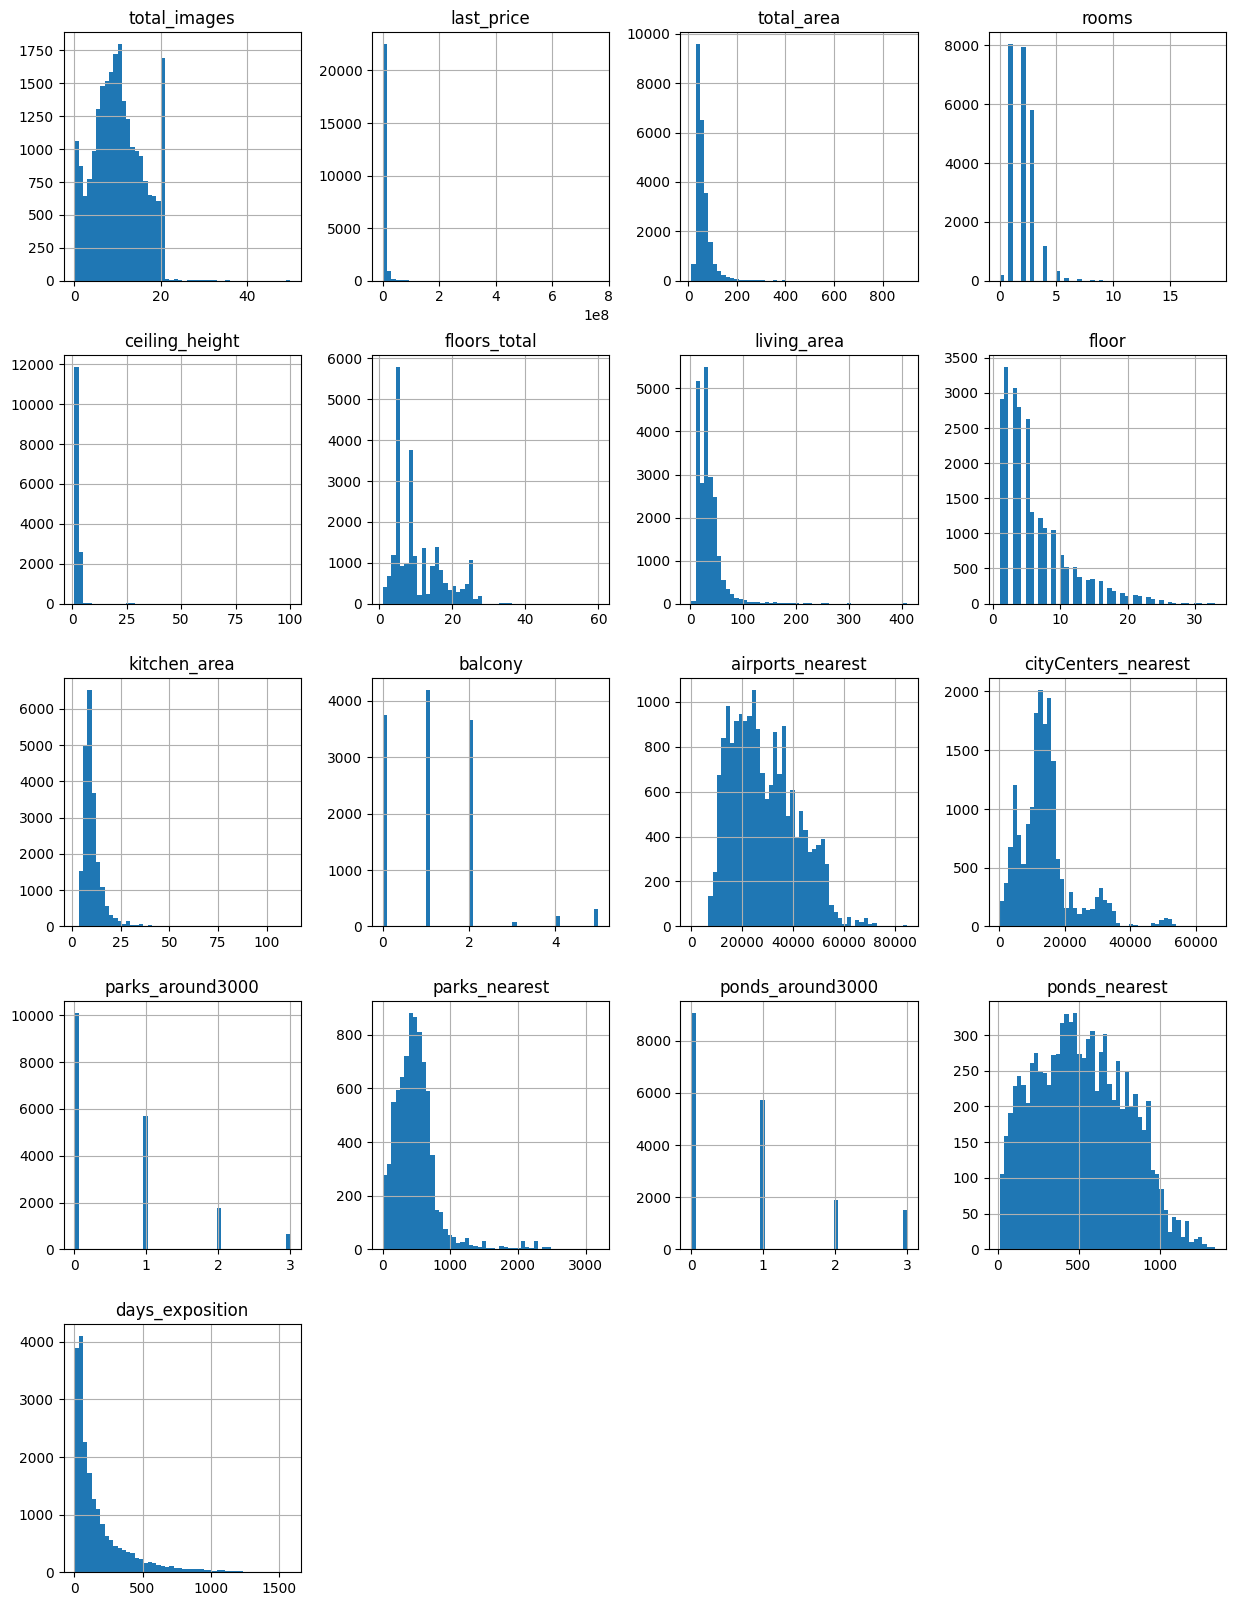

In [5]:
data.hist(figsize=(15, 20), bins=50);

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


**Вывод**

Столбцы `first_day_exposition`, `is_apartment` имеют неверный тип данных. Только 8 столбцов из 22 не имеет пропусков значений. Видны аномальные значения в `rooms` (0 комнат), `ceiling_height` (огромные высоты потолков).


### Предобработка данных

**Обработка пропусков**                                                                                                 
Столбцы с пропусками: ceiling_height, floors_total, living_area, is_apartment, kitchen_area, balcony,  airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition. Видно, что первая половина – вводимые пользователем данные, тут играет роль человеческий фактор. Вторая половина – картографические и рассчетные данные, тут возможны и технические ошибки.                                                                       

living_area – Вероятно, не указано для тех объектов, которые не являются жилыми помещениями (коммерческая недвижимость). Можно заменить пустые значения нулями. Аналогично для kitchen_area (нет кухни = 0) и balcony (нет балкона = 0);            
is_apartment – Вероятно, отсутствующие значения – это False;                                                               
ceiling_height – Если отбросить аномальные значения (1 м и 100 м), то разброс высот потолков не очень велик. И замена отсутствующих значений медианой выглядит разумной.

In [7]:
#заполняем пропущенные значения, где это возможно
data['is_apartment'] = data['is_apartment'].fillna('False')
data['living_area'] = data['living_area'].fillna(0)
data['kitchen_area'] = data['kitchen_area'].fillna(0)
data['balcony'] = data['balcony'].fillna(0)
data['ceiling_height'] = data['ceiling_height'].fillna(2.65)
#проверяем результат
display(data['is_apartment'].isna().sum())
display(data['living_area'].isna().sum())
display(data['kitchen_area'].isna().sum())
display(data['balcony'].isna().sum())
display(data['ceiling_height'].isna().sum())

0

0

0

0

0

**Изменение типов данных**                                                                                                 
Исходя из имеющихся значений и документации, следующие столбцы должны иметь указанный тип данных:                           
first_day_exposition – datetime: это дата публикации объявления                                                             
is_apartment – булев тип: характеризует, является ли объект апартаментами

In [8]:
#изменяем типы данных
data['is_apartment'] = data['is_apartment'].astype(bool)
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')
data['balcony'] = data['balcony'].astype(int)

**Удаление дубликатов**                                                                                                 
1. Проверим, имеются ли в датасете явные дубликаты и удалим их

In [9]:
data.duplicated().sum()

0

2. Неявные дубликаты в названиях населенных пунктов будут мешать анализу данных. Попытаемся выявить их и удалить.

In [10]:
display(data['locality_name'].unique())
display(len(data['locality_name'].unique()))

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

365

Видим множество неявных дубликатов типа "посёлок - поселок" и "поселок городского типа" - "поселок". Приведем к единому написанию: "поселок", без уточнений

In [11]:
dict_to_replace1 = {'посёлок':'поселок'}
dict_to_replace2 = {'коттеджный поселок':'поселок', 'городской поселок':'поселок','поселок городского типа':'поселок','поселок при железнодорожной': 'поселок', 'поселок Мурино':'Мурино'}
data['locality_name'].replace(dict_to_replace1, regex=True, inplace=True)
data['locality_name'].replace(dict_to_replace2, regex=True, inplace=True)

In [12]:
display(data['locality_name'].unique())
display(len(data['locality_name'].unique()))

array(['Санкт-Петербург', 'поселок Шушары', 'поселок Янино-1',
       'поселок Парголово', 'Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок Красный Бор', 'Гатчина', 'деревня Фёдоровское', 'Выборг',
       'Кронштадт', 'Кировск', 'деревня Новое Девяткино',
       'поселок Металлострой', 'поселок Лебяжье', 'поселок Сиверский',
       'поселок Молодцово', 'поселок Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок Ефимовский', 'поселок Плодовое', 'деревня Заклинье',
       'поселок Торковичи', 'поселок Первомайское', 'Красное Село',
       'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет', 'Сланцы',
       'село Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый 

319

**Обработка аномальных значений**

Выше уже указывалось, что в некоторых столбцах есть аномальные значения. Посмотрим более внимательно на статистику (после изменения типов данных и удаления дубликатов), чтобы выявить их:

In [13]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.0,9.00,14.00,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.0,4650000.00,6800000.00,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.0,52.00,69.90,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.0,2.00,3.00,19.0
ceiling_height,23699.0,2.724358e+00,9.882985e-01,1.0,2.6,2.65,2.70,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.0,9.00,16.00,60.0
living_area,23699.0,3.169093e+01,2.310967e+01,0.0,17.8,29.00,41.10,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.0,4.00,8.00,33.0
kitchen_area,23699.0,9.553814e+00,6.420973e+00,0.0,6.3,9.00,11.44,112.0
balcony,23699.0,5.910798e-01,9.592982e-01,0.0,0.0,0.00,1.00,5.0


Видно, что в столбце rooms присутствуют нулевые значения, что странно: сложно представить себе недвижимость без комнат. Поэтому есть смысл заменить их на 1. На гистограмме их не много, это не должно сильно исказить результаты.

In [14]:
dict_to_replace3 = {0:1}
data['rooms'].replace(dict_to_replace3, regex=True, inplace=True)
data['rooms'].describe()

count    23699.000000
mean         2.078948
std          1.066196
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

С высотой потолков ситуация более загадочная, изучим список уникальных значений столбца:

In [15]:
display(data['ceiling_height'].sort_values(ascending=True).unique())

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

Вызывает удивление наличие чрезвычайно низких (1, 1.2 м) и высоких (8 м и более) значений. Значения 20, 22.6, 24, 25, 26, 27, 27.5 и 32 м выглядят как явная ошибка (х10 от реального значения). Остальные аномальные значения можно заменить на медианное (2.65 м).

In [16]:
#определим для этой цели функцию
def height_improvement(row):
    try:
        if (row['ceiling_height'] < 1.7):
            return 2.65
        elif (1.7 <= row['ceiling_height'] < 7):
            return row['ceiling_height']
        elif (7 <= row['ceiling_height'] < 17):
            return 2.65
        elif (17 <= row['ceiling_height'] < 70):
            return (row['ceiling_height']/10)
        elif (row['ceiling_height']>=70):
            return 2.65
    except:
        pass

#применяем функцию к строкам датафрейма
data['ceiling_height'] = data.apply(height_improvement, axis=1)

#проверяем результат
display(data['ceiling_height'].sort_values(ascending=True).unique())

array([1.75, 2.  , 2.2 , 2.25, 2.26, 2.3 , 2.34, 2.4 , 2.45, 2.46, 2.47,
       2.48, 2.49, 2.5 , 2.51, 2.52, 2.53, 2.54, 2.55, 2.56, 2.57, 2.58,
       2.59, 2.6 , 2.61, 2.62, 2.63, 2.64, 2.65, 2.66, 2.67, 2.68, 2.69,
       2.7 , 2.71, 2.72, 2.73, 2.74, 2.75, 2.76, 2.77, 2.78, 2.79, 2.8 ,
       2.81, 2.82, 2.83, 2.84, 2.85, 2.86, 2.87, 2.88, 2.89, 2.9 , 2.91,
       2.92, 2.93, 2.94, 2.95, 2.96, 2.97, 2.98, 2.99, 3.  , 3.01, 3.02,
       3.03, 3.04, 3.05, 3.06, 3.07, 3.08, 3.09, 3.1 , 3.11, 3.12, 3.13,
       3.14, 3.15, 3.16, 3.17, 3.18, 3.2 , 3.21, 3.22, 3.23, 3.24, 3.25,
       3.26, 3.27, 3.28, 3.29, 3.3 , 3.31, 3.32, 3.33, 3.34, 3.35, 3.36,
       3.37, 3.38, 3.39, 3.4 , 3.42, 3.43, 3.44, 3.45, 3.46, 3.47, 3.48,
       3.49, 3.5 , 3.51, 3.52, 3.53, 3.54, 3.55, 3.56, 3.57, 3.58, 3.59,
       3.6 , 3.62, 3.63, 3.65, 3.66, 3.67, 3.68, 3.69, 3.7 , 3.75, 3.76,
       3.78, 3.8 , 3.82, 3.83, 3.84, 3.85, 3.86, 3.87, 3.88, 3.9 , 3.93,
       3.95, 3.98, 4.  , 4.06, 4.1 , 4.14, 4.15, 4.

Изучим значения стоимости квартир:

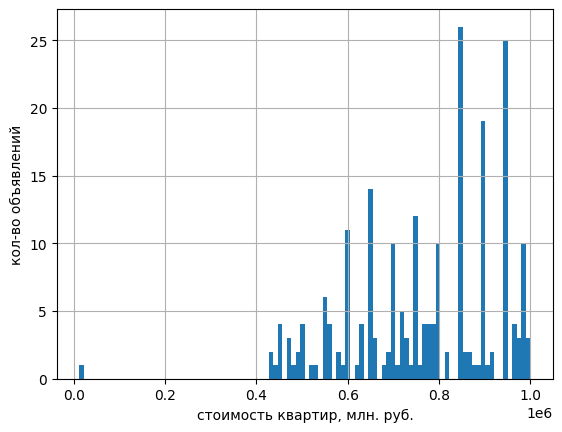

In [17]:
data.query('last_price < 1000000')['last_price'].hist(bins=100);
plt.xlabel('стоимость квартир, млн. руб.');
plt.ylabel('кол-во объявлений');

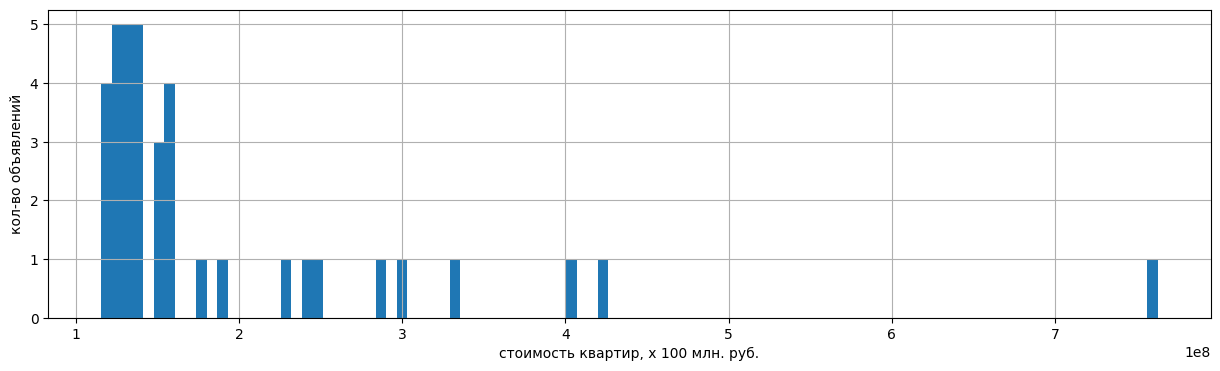

In [18]:
data.query('last_price > 100000000')['last_price'].hist(bins=100, figsize=(15,4));
plt.xlabel('стоимость квартир, х 100 млн. руб.');
plt.ylabel('кол-во объявлений');

Есть только одно аномально низкое значение (12190) и несколько аномально высоких значений. Можно отбросить значения меньше 400 тыс. руб. и более 200 млн руб., т.к. это не сильно повлияет на дальнейший анализ.

In [19]:
data = data.query('400000 < last_price < 200000000')
print('Отбросили строк:', (23699 - data.shape[0]))
print('или в %:', (100 - data.shape[0] / 236.99) )

Отбросили строк: 10
или в %: 0.042195873243599635


Теперь общая площадь:

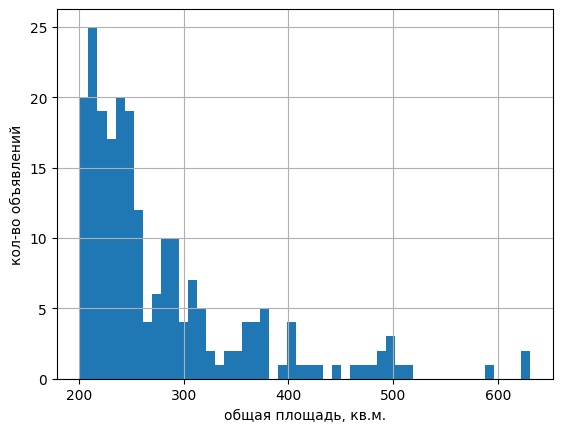

In [20]:
data.query('total_area > 200')['total_area'].hist(bins=50);
plt.xlabel('общая площадь, кв.м.');
plt.ylabel('кол-во объявлений');

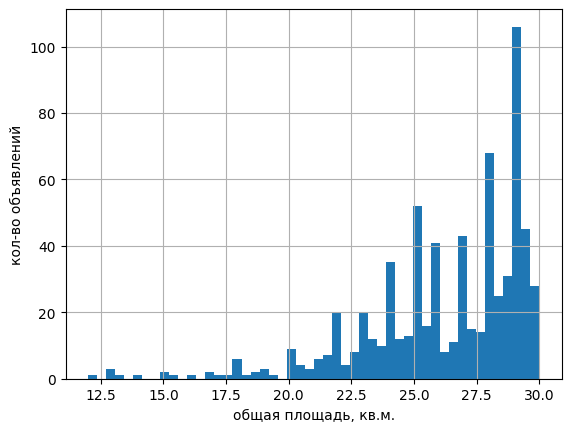

In [21]:
data.query('total_area < 30')['total_area'].hist(bins=50);
plt.xlabel('общая площадь, кв.м.');
plt.ylabel('кол-во объявлений');

Видно, что можно отрезать аномально малые и крупные значения:

In [22]:
data = data.query('19 < total_area < 350')
print('Отбросили строк:', (23699 - data.shape[0]))
print('или в %:', (100 - data.shape[0] / 236.99) )

Отбросили строк: 71
или в %: 0.29959070002954036


### Расчет и добавление новых признаков

In [23]:
# Добавляем новый столбец с ценой кв. метра
data['sq_meter_price'] = data['last_price'] / data['total_area']

# Добавляем новый столбец с днем недели публикации объявления
data['first_day_weekday'] = pd.DatetimeIndex(data['first_day_exposition']).weekday

# Добавляем новый столбец с месяцем публикации объявления
data['first_day_month'] = pd.DatetimeIndex(data['first_day_exposition']).month

# Добавляем новый столбец с годом публикации объявления
data['first_day_year'] = pd.DatetimeIndex(data['first_day_exposition']).year

# Добавляем новый столбец с расстоянием до центра в км (округленное целочисленное значение)
# При этом пустым значениям будет соответствовать '-1'
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(-1000)
data['center_distance'] = (data['cityCenters_nearest']/1000).astype(int)

In [24]:
# Добавляем новый столбец с типом этажа квартиры (значения — «первый», «последний», «другой»)
# с помощью функции категоризации
def categorize_floor(raw):
    try:
        if (raw['floor'] == 1):
            return 'первый'
        elif (raw['floor'] == raw['floors_total'])&(raw['floors_total'] > 1):
            return 'последний'
        else:
            return 'другой'
    except:
        pass
data['floor_category'] = data.apply(categorize_floor, axis=1)

### Исследовательский анализ данных

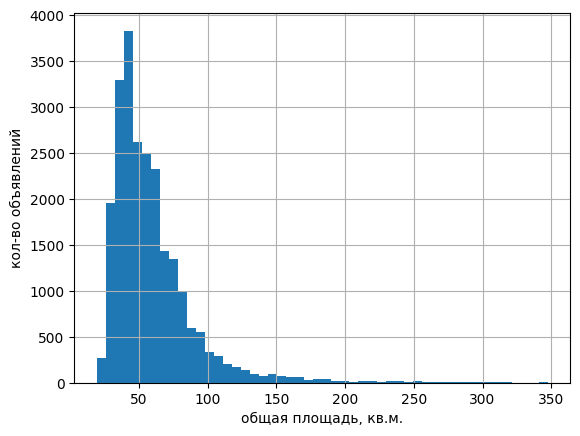

In [25]:
#выведем гистограмму по общей площади квартир
data['total_area'].hist(bins=50);
plt.xlabel('общая площадь, кв.м.');
plt.ylabel('кол-во объявлений');

Видим скошенное вправо распределение с максимумом около 50+ кв. метров - это наиболее частое предложение.

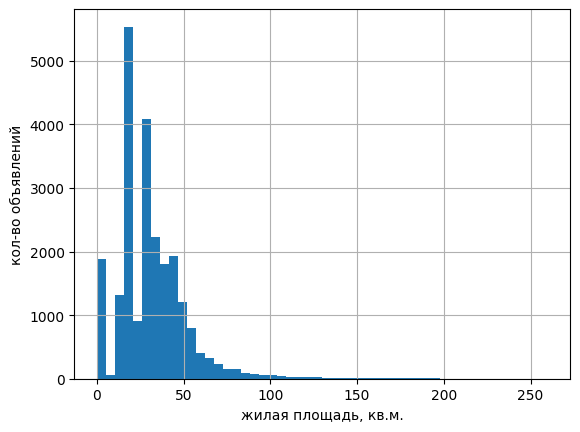

In [26]:
#выведем гистограмму по жилой площади квартир
data['living_area'].hist(bins=50);
plt.xlabel('жилая площадь, кв.м.');
plt.ylabel('кол-во объявлений');

Здесь все похоже, но: 1. Максимум сдвинут на 30 кв.метров; 2. Есть нулевые значения (вероятно, соответствующие нежилым помещениям и пр.) 

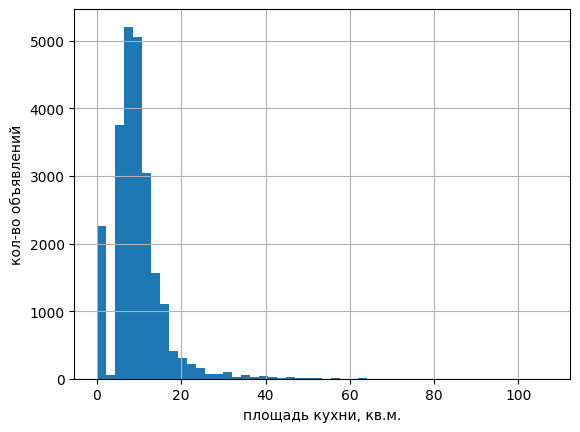

In [27]:
#выведем гистограмму по площади кухни
data['kitchen_area'].hist(bins=50);
plt.xlabel('площадь кухни, кв.м.');
plt.ylabel('кол-во объявлений');

Типичная кухня - около 10 кв. метров, есть объекты без кухни

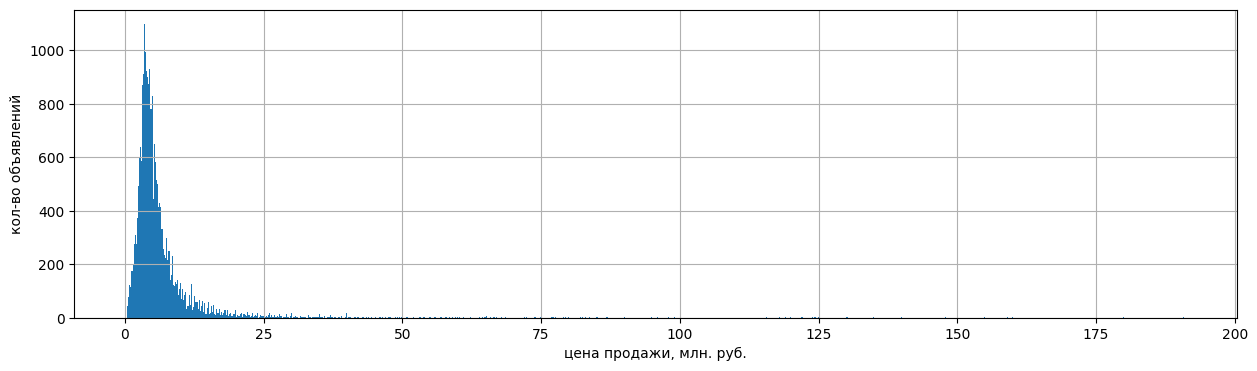

In [28]:
#выведем гистограмму по ценам объектов
(data['last_price']/1000000).hist(bins=1000, figsize=(15,4));
plt.xlabel('цена продажи, млн. руб.');
plt.ylabel('кол-во объявлений');

Впечатляет разброс цен: фактически 4 порядка. Однако и тут мы видим скошенное распределение с максимумом около 4,5 млн

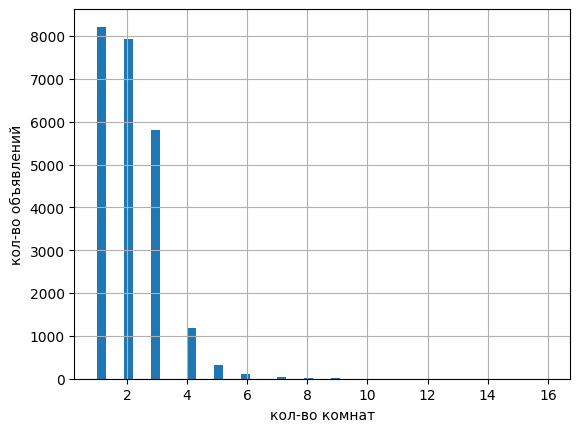

In [29]:
#выведем гистограмму по количеству комнат
data['rooms'].hist(bins=50);
plt.xlabel('кол-во комнат');
plt.ylabel('кол-во объявлений');

Одно- и двух-комнатные квартиры - лидеры рынка

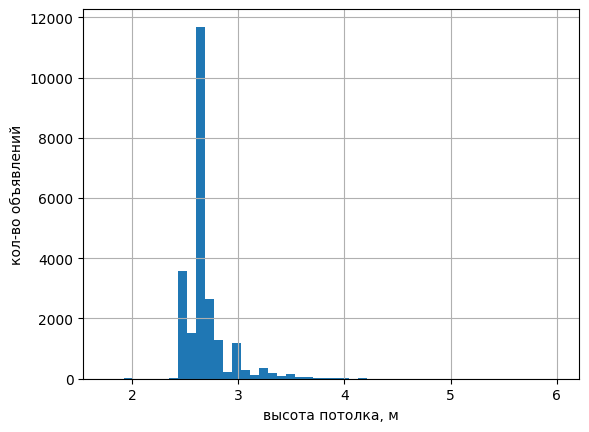

In [30]:
#выведем гистограмму по высоте потолков
data['ceiling_height'].hist(bins=50);
plt.xlabel('высота потолка, м');
plt.ylabel('кол-во объявлений');

Разброс по высоте потолков небольшой: подавляющее большинство объектов имеет потолки в районе 2.5-2.8 м

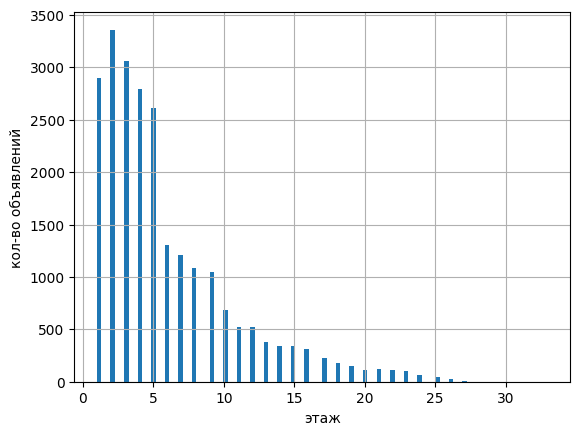

In [31]:
#выведем гистограмму по этажам квартир
data['floor'].hist(bins=100);
plt.xlabel('этаж');
plt.ylabel('кол-во объявлений');

Больше всего в датасете представлены объекты на 1-5 этажах

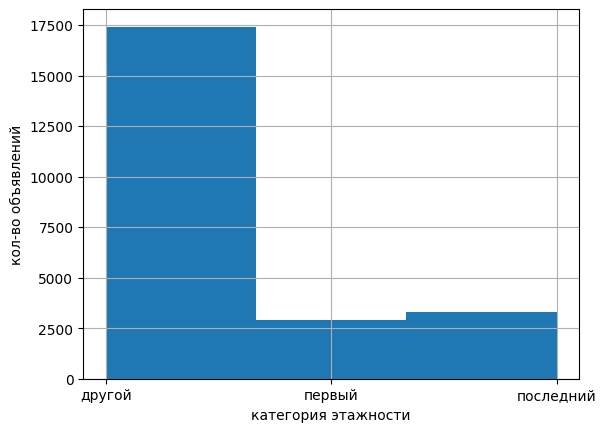

In [32]:
#выведем гистограмму по типам этажей квартир
data['floor_category'].hist(bins=3);
plt.xlabel('категория этажности');
plt.ylabel('кол-во объявлений');

"Первый и последний не предлагать" стало устойчивым выражением не случайно

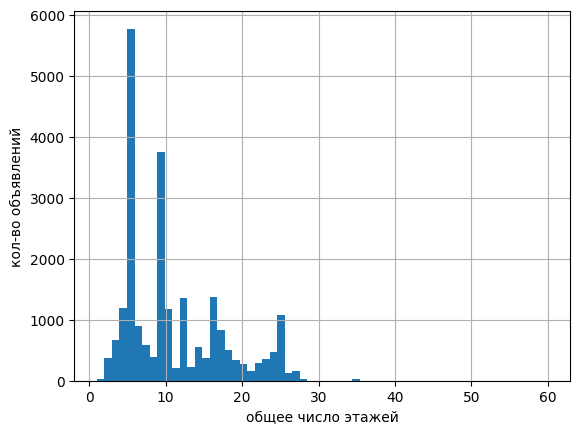

In [33]:
#выведем гистограмму по общей этажности объектов
data['floors_total'].hist(bins=60);
plt.xlabel('общее число этажей');
plt.ylabel('кол-во объявлений');

Наиболее распространенные дома - 5- и 9-этажные

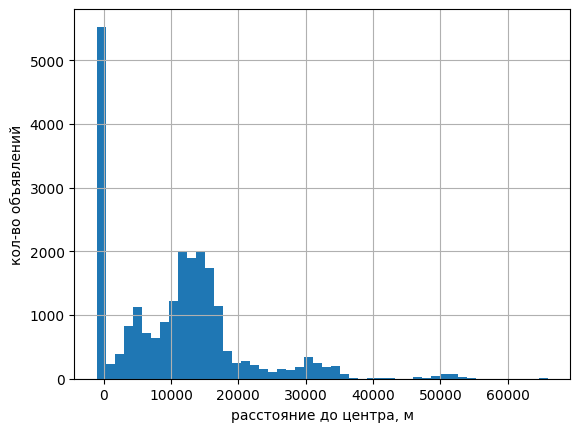

In [34]:
#выведем гистограмму по расстояниям до центра города в метрах
data['cityCenters_nearest'].hist(bins=50);
plt.xlabel('расстояние до центра, м');
plt.ylabel('кол-во объявлений');

Видим большой "нулевой" пик - соответствующий, собственно, объектам в центре - и огромное количество объектов в 9-18 км от него.

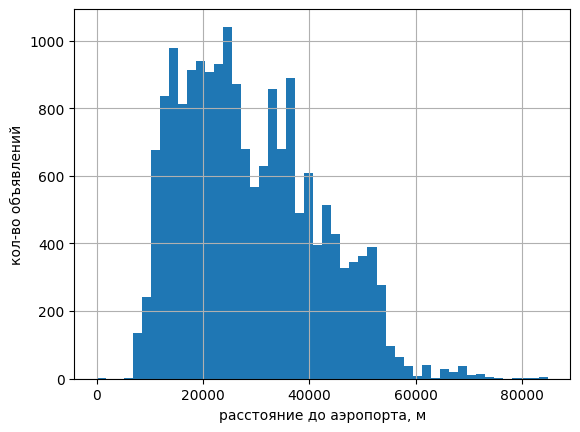

In [35]:
#выведем гистограмму по расстояниям до ближайшего аэропорта в метрах
data['airports_nearest'].hist(bins=50);
plt.xlabel('расстояние до аэропорта, м');
plt.ylabel('кол-во объявлений');

Большинство объектов располагается довольно далеко от аэропортов (15-30 км)

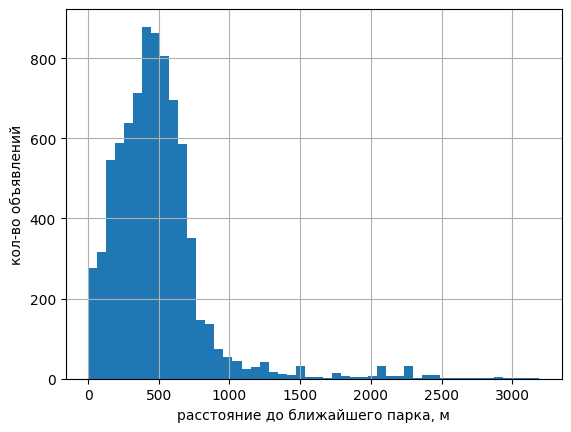

In [36]:
#выведем гистограмму по расстояниям до ближайшего парка в метрах
data['parks_nearest'].hist(bins=50);
plt.xlabel('расстояние до ближайшего парка, м');
plt.ylabel('кол-во объявлений');

У большинства объектов на расстоянии 200-700 м имеется парк

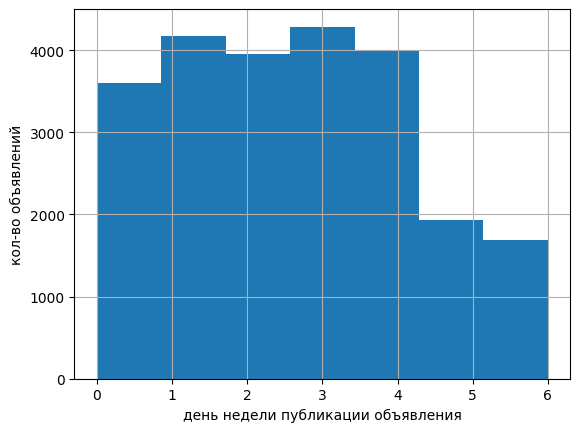

In [37]:
#выведем гистограмму по дням публикации объявлений
data['first_day_weekday'].hist(bins=7);
plt.xlabel('день недели публикации объявления');
plt.ylabel('кол-во объявлений');

Выходные - "неурожайное" время для объявлений о продаже квартиры

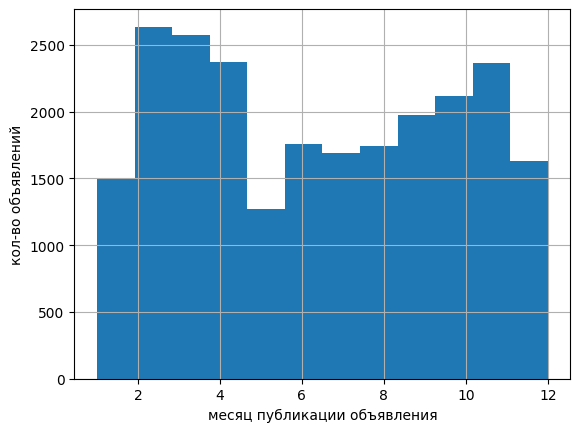

In [38]:
#выведем гистограмму по месяцам публикации объявлений
data['first_day_month'].hist(bins=12);
plt.xlabel('месяц публикации объявления');
plt.ylabel('кол-во объявлений');

Также для объявлений характерны "новогодний" и "майский" провалы

**Вывод**

Суммарно по всем объявлениям наиболее распространены квартиры с общей площадью около 50+ кв. метров, жилой - 30 кв. метров. Типичная кухня - около 10 кв. метров, есть объекты без кухни. Впечатляет разброс цен: 4 порядка с выраженным максимумом около 4,5 млн. Одно- и двух-комнатные квартиры - лидеры рынка. Подавляющее большинство объектов имеет потолки в районе 2.5-2.8 м. Больше всего в датасете представлены объекты на 1-5 этажах, первый и последний этажи представлены хуже остальных. Наиболее распространенные дома - 5- и 9-этажные. По локациям: представлено большое количество объектов в 9-18 км от центра. Большинство объектов располагается довольно далеко от аэропортов (15-30 км). У большинства объектов на расстоянии 200-700 м имеется парк. Объявления о продаже квартир чаще публикуют в будние дни, имеются ярко выраженные "провалы" в статистике объявлений: новогодний (декабрь-январь) и майский (май-август).

Изучим, как быстро продавались квартиры (столбец days_exposition)

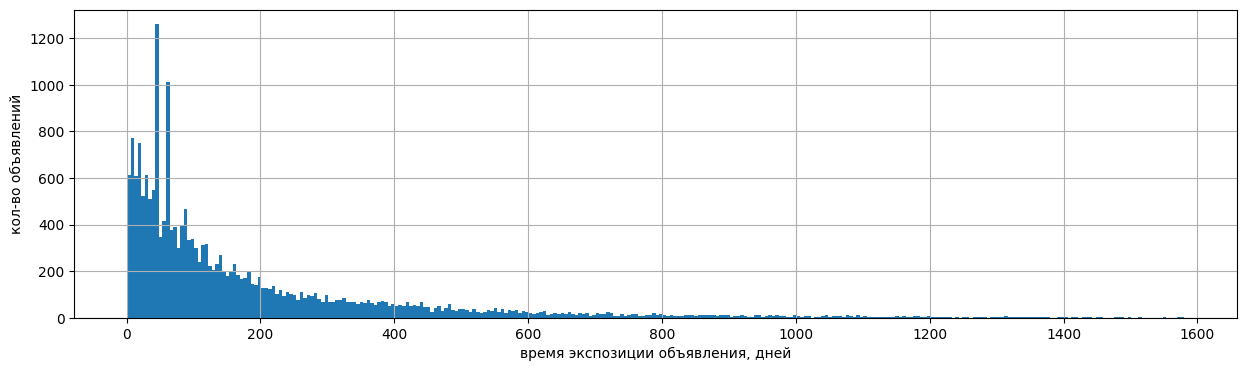

In [39]:
data['days_exposition'].hist(bins=300, figsize=(15,4));
plt.xlabel('время экспозиции объявления, дней');
plt.ylabel('кол-во объявлений');

In [40]:
data['days_exposition'].describe()

count    20459.000000
mean       180.940222
std        219.710004
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

**Вывод**

Видно, что большинство объявлений закрываются после 6-8 месяцев. Есть необычайно длительные экспозиции - более 1,5 лет, но есть и значительная доля "быстрых" продаж - до 45 дней.

**Какие факторы больше всего влияют на общую (полную) стоимость объекта?**                                                     

Изучим, зависит ли цена от:
- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год).

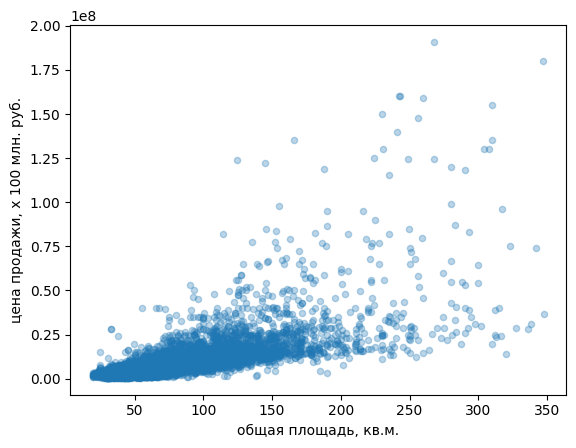

In [41]:
data.plot(x='total_area', y='last_price', kind='scatter', alpha=0.3,
          xlabel='общая площадь, кв.м.', ylabel='цена продажи, х 100 млн. руб.');

In [42]:
data['total_area'].corr(data['last_price'])

0.7192498033253147

Видно, что корелляция с общей площадью положительная и сравнительно сильная. Но при высоких значениях площади разброс цен резко возрастает.

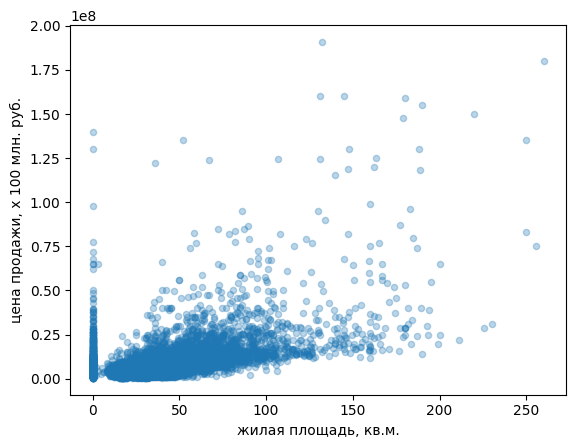

In [43]:
data.plot(x='living_area', y='last_price', kind='scatter', alpha=0.3,
         xlabel='жилая площадь, кв.м.', ylabel='цена продажи, х 100 млн. руб.');

In [44]:
data['living_area'].corr(data['last_price'])

0.5465891987457832

Явно видны два тренда - для "нежилой" недвижимости (отсутствие корреляции, нулевой "столб") и аналогичная общей площади корреляция для остальных данных.

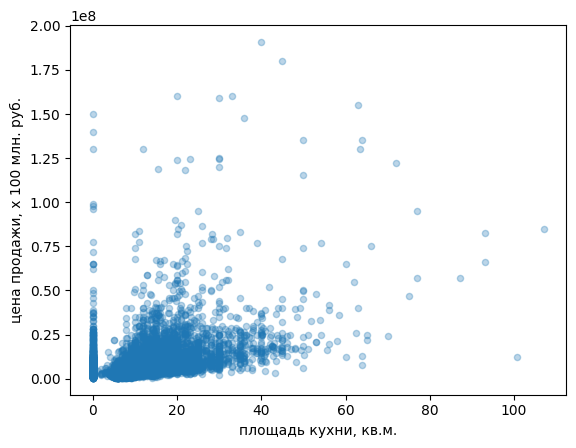

In [45]:
data.plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.3,
         xlabel='площадь кухни, кв.м.', ylabel='цена продажи, х 100 млн. руб.');

In [46]:
data['kitchen_area'].corr(data['last_price'])

0.4618748053899463

Ситуация аналогична вышеописанной, с жилой площадью. Разница в том, что здесь корреляция еще слабее.

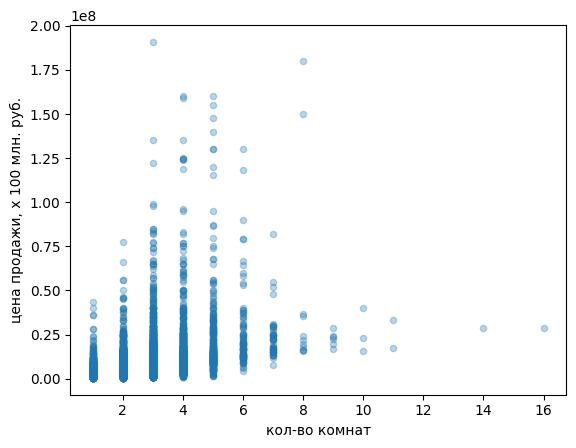

In [47]:
data.plot(x='rooms', y='last_price', kind='scatter', alpha=0.3,
          xlabel='кол-во комнат', ylabel='цена продажи, х 100 млн. руб.');

In [48]:
data['rooms'].corr(data['last_price'])

0.4269084227331595

Зависимость цены от количества комнат имеет сложный, нелинейный характер - если мы пытаемся рассмотреть все данные.

In [49]:
data.groupby('rooms')['last_price'].describe()

,count,mean,std,min,25%,50%,75%,max
rooms,,,,,,,,
1,8216.0,3.816314e+06,1.843561e+06,430000.0,2900000.0,3590000.0,4400000.0,43511000.0
2,7938.0,5.556575e+06,3.769154e+06,430000.0,3690000.0,4770169.0,6550000.0,77612080.0
3,5812.0,8.110635e+06,7.736582e+06,550000.0,4779753.5,6200000.0,9000000.0,190870000.0
4,1177.0,1.327692e+07,1.518781e+07,999000.0,6200000.0,9000000.0,14800000.0,159984000.0
5,318.0,2.144941e+07,2.392942e+07,1650000.0,9992500.0,13800000.0,24550000.0,160000000.0
6,99.0,2.533863e+07,2.180223e+07,4390000.0,13000000.0,17900000.0,28900000.0,130000000.0
7,44.0,2.387250e+07,1.334277e+07,7900000.0,15837500.0,22080000.0,26375000.0,82000000.0
8,11.0,4.860818e+07,5.838399e+07,15800000.0,17250000.0,22190000.0,36100000.0,180000000.0
9,6.0,2.254167e+07,4.118303e+06,17000000.0,20187500.0,22875000.0,23875000.0,29000000.0


Видно, что для многокомнатных квартир размеры выборок резко падают, что отражается на достоверности получаемых оценок. Если ограничится 1-5-комнатными квартирами:

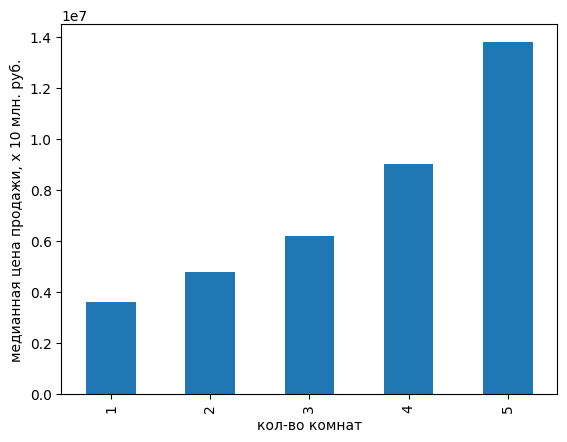

In [50]:
data_by_rooms = data.query('1 <= rooms <= 5').pivot_table(index='rooms', values='last_price', aggfunc='median')
data_by_rooms.plot(kind='bar', xlabel='кол-во комнат', ylabel='медианная цена продажи, х 10 млн. руб.', legend=False);

Тут видна положительная корреляция

In [51]:
data.groupby('floor_category')['last_price'].describe()

,count,mean,std,min,25%,50%,75%,max
floor_category,,,,,,,,
другой,17414.0,6.573970e+06,7.490427e+06,450000.0,3600000.0,4850000.0,6999000.0,190870000.0
первый,2900.0,4.745614e+06,4.720715e+06,430000.0,2800000.0,3900000.0,5400000.0,135000000.0
последний,3314.0,6.404168e+06,8.828560e+06,430000.0,3000000.0,4300000.0,6695000.0,155000000.0


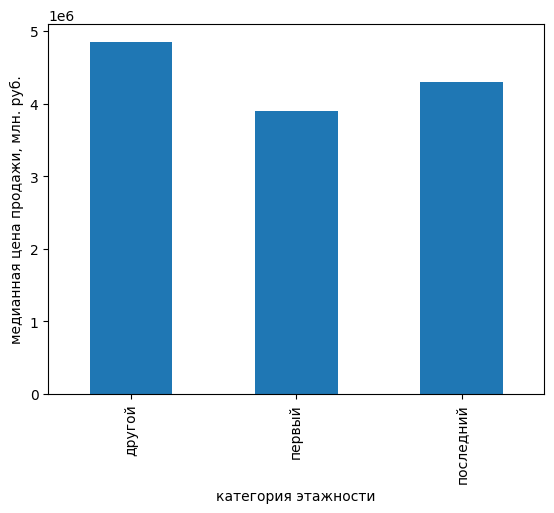

In [52]:
data_by_floor_type = data.pivot_table(index='floor_category', values='last_price', aggfunc='median')
data_by_floor_type.plot(kind='bar', xlabel='категория этажности', ylabel='медианная цена продажи, млн. руб.',
                        legend=False);

В целом, если ориентироваться на медианные значения, то наиболее ценные этажи - "другие", а первые наиболее дешевые. Однако корреляция тут слабая: множество других факторов влияет на цену и разброс внутри групп огромный.

In [53]:
data.groupby('first_day_weekday')['last_price'].describe()

,count,mean,std,min,25%,50%,75%,max
first_day_weekday,,,,,,,,
0,3601.0,6.289278e+06,6.772964e+06,430000.0,3450000.0,4650000.0,6700000.00,160000000.0
1,4175.0,6.266381e+06,7.013165e+06,430000.0,3442500.0,4720000.0,6800000.00,159000000.0
2,3955.0,6.294522e+06,6.953771e+06,450000.0,3445000.0,4700000.0,6900000.00,180000000.0
3,4286.0,6.638096e+06,8.242334e+06,450000.0,3450000.0,4650000.0,6924227.25,159984000.0
4,3995.0,6.325969e+06,8.275123e+06,450000.0,3442000.0,4580000.0,6700000.00,190870000.0
5,1927.0,6.069781e+06,6.923356e+06,550000.0,3350000.0,4550000.0,6525000.00,124480000.0
6,1689.0,6.122290e+06,7.259220e+06,470000.0,3400000.0,4550000.0,6500000.00,130000000.0


Корреляции цены с днем недели публикации не наблюдается

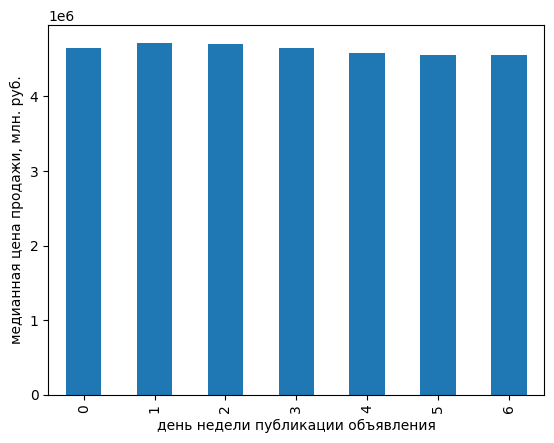

In [54]:
data_by_day = data.pivot_table(index='first_day_weekday', values='last_price', aggfunc='median')
data_by_day.plot(kind='bar', xlabel='день недели публикации объявления', ylabel='медианная цена продажи, млн. руб.',
                        legend=False);

Аналогично и с месяцем публикации:

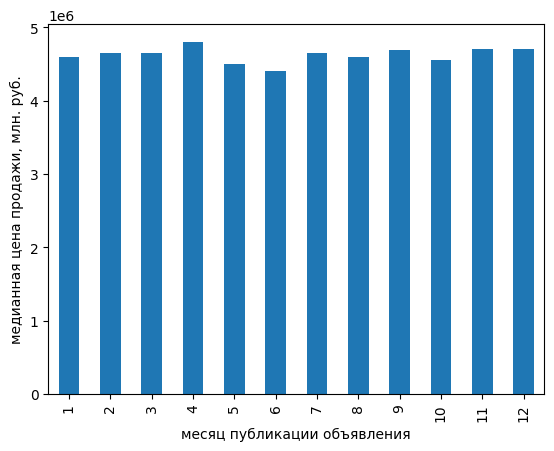

In [55]:
data_by_month = data.pivot_table(index='first_day_month', values='last_price', aggfunc='median')
data_by_month.plot(kind='bar', xlabel='месяц публикации объявления', ylabel='медианная цена продажи, млн. руб.',
                        legend=False);

In [56]:
data.groupby('first_day_year')['last_price'].describe()

,count,mean,std,min,25%,50%,75%,max
first_day_year,,,,,,,,
2014,137.0,1.208714e+07,1.251968e+07,1200000.0,4421650.0,7700000.0,14500000.0,79339000.0
2015,1188.0,8.471595e+06,1.305160e+07,650000.0,3750000.0,5350000.0,8250000.0,180000000.0
2016,2778.0,6.582264e+06,8.725046e+06,490000.0,3400000.0,4540000.0,6800000.0,190870000.0
2017,8164.0,6.239150e+06,7.277401e+06,450000.0,3350000.0,4500000.0,6650000.0,159000000.0
2018,8497.0,5.873973e+06,6.052143e+06,430000.0,3370000.0,4550000.0,6500000.0,160000000.0
2019,2864.0,6.498433e+06,6.410003e+06,430000.0,3700000.0,5050000.0,7200000.0,135000000.0


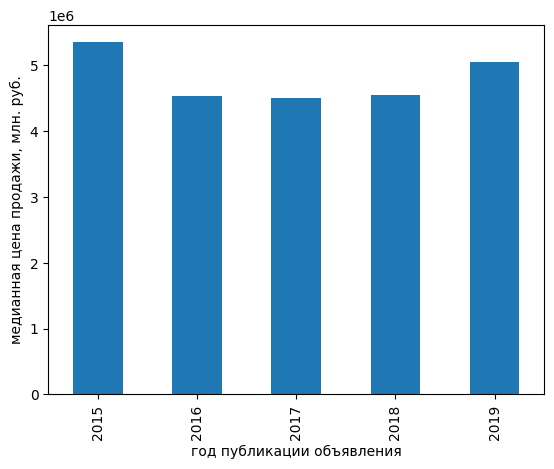

In [57]:
data_by_year = data.query('first_day_year > 2014').pivot_table(index='first_day_year', values='last_price', aggfunc='median')
data_by_year.plot(kind='bar', xlabel='год публикации объявления', ylabel='медианная цена продажи, млн. руб.',
                        legend=False);

Для построения диаграммы мы отбросили данные за 2014 год, т.к. они непредставительны Видно, что медианная цена немного скорректировалась после 2015 г. В 2019 г. наметился рост.

**Вывод**

Цена объектов сильнее всего зависит от общей площади, затем жилой. Площадь кухни и количество комнат имеют более сложное влияние на цену. Если ограничится 1-5-комнатными квартирами, то есть положительная корреляция цена-количество комнат. Наиболее "ценный" тип этажа - "другие". С днем недели и месяцем публикации объявления корреляции не наблюдается. Медианная цена немного скорректировалась после 2015 г, а в 2019 г. наметился рост.

Изучим средние цены кв.метра по населенным пунктам. Для этого сделаем сводную таблицу с количеством записей и средней ценой кв.метра:

In [58]:
data_by_locality = data.pivot_table(index='locality_name', values='sq_meter_price', aggfunc=['count', 'mean'])
data_by_locality.columns =['count', 'sq_meter_price']
display(data_by_locality.sort_values(by='count', ascending=False).head(10))

,count,sq_meter_price
locality_name,,
Санкт-Петербург,15659,114242.518227
Мурино,590,86087.512050
поселок Шушары,439,78655.592167
Всеволожск,398,68654.473986
Пушкин,366,103085.949105
Колпино,338,75424.579098
поселок Парголово,327,90175.913458
Гатчина,307,68746.146763
деревня Кудрово,299,92473.547576


Найдем населённый пункт с самой высокой стоимостью квадратного метра:

In [59]:
data_by_locality = data_by_locality.query('count > 236')
data_by_locality['sq_meter_price'].idxmax()

'Санкт-Петербург'

Найдем населённый пункт с самой низкой стоимостью квадратного метра:

In [60]:
data_by_locality['sq_meter_price'].idxmin()

'Выборг'

**Вывод**

Цены в 10 наиболее представленных населенных пунктах в среднем лежат в диапазоне 58-115 тыс. руб. за кв. м. Самый дорогой квадратный метр в Санкт-Петербурге, самый дешевый - в Выборге.

Вычислим среднюю цену каждого километра от центра для объектов, расположенных в Санкт-Петербурге. Для этого сделаем сводную таблицу из среза данных. Учитываем, что пропускам исходных данных соответствует отрицательное значение (-1).

In [61]:
data_by_dist = data.query('(locality_name == "Санкт-Петербург") & (center_distance >= 0)'
                          ).pivot_table(index='center_distance', values='last_price')

И построим диаграмму по полученным данным:

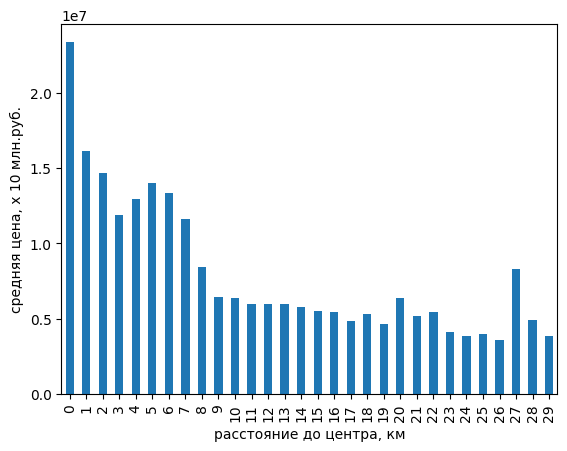

In [62]:
data_by_dist.plot(kind='bar', xlabel='расстояние до центра, км', ylabel='средняя цена, х 10 млн.руб.', legend=False);

**Вывод**

Имеется отрицательная корреляция цены с расстоянием от центра. Причем до расстояния 8-9 км цена падает резко, затем - более плавно.

### Общий вывод

1. Суммарно по всем объявлениям наиболее распространены квартиры с общей площадью около 50+ кв. метров, жилой - 30 кв. метров. Типичная кухня - около 10 кв. метров, есть объекты без кухни. Впечатляет разброс цен: 4 порядка с выраженным максимумом около 4,5 млн. Одно- и двух-комнатные квартиры - лидеры рынка. Подавляющее большинство объектов имеет потолки в районе 2.5-2.8 м. Больше всего в датасете представлены объекты на 1-5 этажах, первый и последний этажи представлены хуже остальных. Наиболее распространенные дома - 5- и 9-этажные. По локациям: представлено большое количество объектов в 9-18 км от центра. Большинство объектов располагается довольно далеко от аэропортов (15-30 км). У большинства объектов на расстоянии 200-700 м имеется парк. Объявления о продаже квартир чаще публикуют в будние дни, имеются ярко выраженные "провалы" в статистике объявлений: новогодний (декабрь-январь) и майский (май-август).
2. Большинство объявлений закрываются после 6-8 месяцев. Есть необычайно длительные экспозиции - более 1,5 лет, но есть и значительная доля (примерно четверть от всех) "быстрых" продаж - до 45 дней.
3. Цена объектов сильнее всего зависит от общей площади, затем жилой. Площадь кухни и количество комнат имеют более сложное влияние на цену. Если ограничится 1-5-комнатными квартирами, то есть положительная корреляция цена-количество комнат. Наиболее "ценный" тип этажа - "другие". С днем недели и месяцем публикации объявления корреляции не наблюдается. Медианная цена немного скорректировалась после 2015 г, а в 2019 г. наметился рост.
4. Цены в 10 наиболее представленных населенных пунктах в среднем лежат в диапазоне 58-115 тыс. руб. за кв. м. Самый дорогой квадратный метр в Санкт-Петербурге, самый дешевый - в Выборге.
5. Имеется отрицательная корреляция цены с расстоянием от центра.